# 3. Loops and program syntax

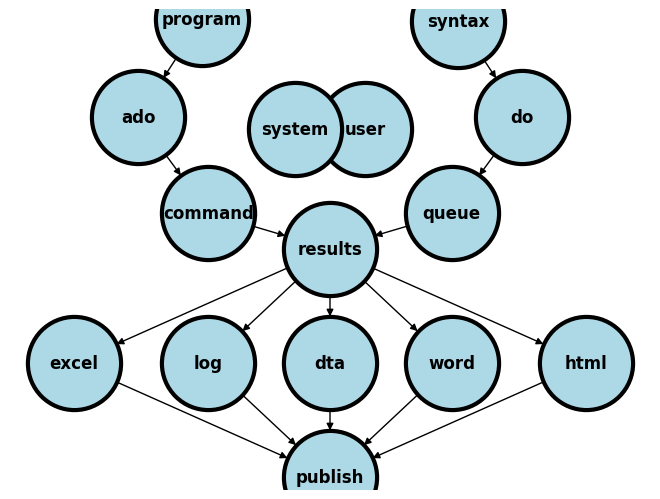

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

By now you should be aware that our key ambitions are to:

   1. Learn the commands and syntax that generate output, typically for statistical inference
   2. Identify the names of the `c()`, `r()`, or `e()` class <u>system-defined</u> macros that define key parameters in our output
   3. Format these values to fit aesthetic, publication, or editorial criteria and save them as <u>user-defined</u> macros
   4. Embed the macros into text, graph, or file (.xlsx, .log, .dta, .docx, .html) 
   5. Achieve these aims in a workflow that is automated, collaborative, open, reproducible, legible, user-friendly, and therefore **rigorous** 

Today we are going to focus on commands and syntax that exponentially increase our efficiency in coding, a key step towards automation. One way to achieve this is by learning about loops. The other is by writing flexible programs that are driven by user-defined inputs.

## 3.1 Loops

### 3.1.1 Over numeric values

Take this code snippet for instance

```stata
forvalues i = 1/26 {
    di `i'
}
```


```stata
. forvalues i =	1/26	{
2.     di `i'
3. }
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26

. 


```
![](forvalues_chatGPT.png)




And take this one:

```stata
use transplants, clear
foreach v of varlist * {
	di `v'
}
```

```stata
. use transplants, clear

. foreach v of varlist *	{
2.         di `v'
3. }
1
12
18551.324
177
79
2
0
9
4
157.48
69.58
28
0
56
28
20421.895
0
1
5.1937032
4
1
0
0
1
1
REFLUX NEPHROPATHY

. 

```

![](forvalues2_chatGPT.png)

### 3.1.2 Over string values

Let's make a subtle modification to the code snippet above:

```stata
use transplants, clear
foreach v of varlist * {
	di "`v'"
}
```

```stata
. use transplants, clear

. foreach v of varlist *	{
2.         di "`v'"
3. }
fake_id
ctr_id
transplant_date
don_hgt_cm
don_wgt_kg
don_cod
don_ecd
dx
race
rec_hgt_cm
rec_wgt_kg
bmi
prev_ki
age
peak_pra
end_date
died
tx_failed
wait_yrs
abo
gender
rec_hcv_antibody
rec_work
pretx_cmv
rec_education
extended_dgn

. 

```

The code you provided loads a dataset named "transplants" and then iterates over all the variables in that dataset using a foreach loop.

Within each iteration of the loop, the di command is used to display the name of the current variable v.

Based on the output you provided, it seems that the dataset "transplants" contains a list of variable names. The code successfully printed the names of each variable in the dataset, with one variable name displayed per line. The variable names include "fake_id", "ctr_id", "transplant_date", "don_hgt_cm", "don_wgt_kg", and so on.

The code snippet you provided successfully displays the names of the variables in the dataset "transplants".

-- chatGPT

What is the output:code ratio in these two examples I've given? Might that be a crude metric of efficiency? 

Consider the following code snippet:

```stata
use transplants, clear
foreach v of varlist * {
	if "`v'" != "died" | "`v'" !="extended_dgn" {
	    capture logistic died `v'
	    capture lincom `v'
	    scalar p = r(p)
	    di "p-value for `v' : " p 	
	}
	else {
		di " "
	}
	
	
}
```

```stata
. use transplants, clear

. foreach v of varlist * {
2.         if "`v'" != "died"  "`v'" !="extended_dgn"	{
3.             capture logistic died `v'
4.             capture lincom `v'
5.             scalar p = r(p)
6.             di "p-value for `v' : " p   
7.         }
8.         else {
9.                 di " "
10.         }
11.         
.         
. }
p-value for fake_id : .46371117
p-value for ctr_id : .52178434
p-value for transplant_date : 2.926e-24
p-value for don_hgt_cm : .93751316
p-value for don_wgt_kg : .49371195
p-value for don_cod : .25255576
p-value for don_ecd : 6.736e-13
p-value for dx : .00894634
p-value for race : .00028468
p-value for rec_hgt_cm : .01878141
p-value for rec_wgt_kg : .10279242
p-value for bmi : .67785746
p-value for prev_ki : .02051579
p-value for age : 1.648e-20
p-value for peak_pra : .02585959
p-value for end_date : 2.891e-63
p-value for died : .
p-value for tx_failed : .
p-value for wait_yrs : .49225994
p-value for abo : .03522145
p-value for gender : .10388923
p-value for rec_hcv_antibody : .02039008
p-value for rec_work : .00018548
p-value for pretx_cmv : .17525206
p-value for rec_education : .47738727
p-value for extended_dgn : .


```

![](chatGPT1.png)



![](chatgpt4.png)

```stata
local decimal_format "%.2f"

foreach v of varlist * {
    if "`v'" != "died" & "`v'" != "extended_dgn" {
        capture logistic died `v'
        capture lincom `v'
        scalar p = r(p)
        
        local p_value_label ""
        
        if p < 0.01 {
            local p_value_label "p<0.01"
        }
        else if p <= 0.05 {
            local p_value_label string(round(p, 0.01))
        }
        else {
            local p_value_label string(round(p, 0.1))
        }
        
        di "`v' : " `p_value_label'
    }
    else {
        di " "
    }
}

```

```stata
. local decimal_format "%.2f"

. 
. foreach v of varlist * {
2.     if "`v'" != "died" & "`v'" != "extended_dgn" {
3.         capture logistic died `v'
4.         capture lincom `v'
5.         scalar p = r(p)
6.         
.         local p_value_label ""
7.         
.         if p < 0.01 {
8.             local p_value_label "p<0.01"
9.         }
10.         else if p <= 0.05 {
11.             local p_value_label string(round(p, 0.01))
12.         }
13.         else {
14.             local p_value_label string(round(p, 0.1))
15.         }
16.         
.         di "`v' : " `p_value_label'
17.     }
18.     else {
19.         di " "
20.     }
21. }
fake_id : .5
ctr_id : .5
transplant_date : 1
don_hgt_cm : .9
don_wgt_kg : .5
don_cod : .3
don_ecd : 1
dx : 1
race : 1
rec_hgt_cm : .02
rec_wgt_kg : .1
bmi : .7
prev_ki : .02
age : 1
peak_pra : .03
end_date : 1

tx_failed : .
wait_yrs : .5
abo : .04
gender : .1
rec_hcv_antibody : .02
rec_work : 1
pretx_cmv : .2
rec_education : .5



```

![](chatGPT6.png)

And so you can use AI as an assistant or copilot for labs, work, and fun:

```stata
use transplants, clear

local decimal_format "%.2f"

// Create an empty Excel file
putexcel set results.xlsx, replace

// Write variable names and formatted p-values to Excel
putexcel A1 = "Variable" B1 = "p-value"

local row = 2
foreach v of varlist * {
    if "`v'" != "died" & "`v'" != "extended_dgn" {
        capture logistic died `v'
        capture lincom `v'
        scalar p = r(p)
        
        local p_value_label ""
        
        if p < 0.01 {
            local p_value_label "p<0.01"
        }
        else if p <= 0.05 {
            local p_value_label: di %3.2f p
        }
        else {
            local p_value_label: di %2.1f p
        }
        
        putexcel A`row' = "`v'"
        putexcel B`row' = "`p_value_label'" 
        
        local row = `row' + 1
    }
}

// Save and close the Excel file
putexcel close

```


Let's build our skills even further by introducing some powerful and new commands:

```stata
use transplants, clear
foreach v of varlist * {
	qui ds, has(type string)
	if r(varlist) == "`v'" {
		 di "`v' is a string"
	}
	else if "`v'" == "died" {
		di "`v' is the outcome"
	}
	else {
		di "`v' is numeric"
		logistic died `v'
		di _b[`v']
	}
	
}
```

Based on the code you provided, it appears that you want to iterate over each variable in the "transplants" dataset and perform different actions based on whether the variable is numeric, string, or the outcome variable "died". Additionally, for numeric variables, you want to fit a logistic regression model and display the coefficient.     
    
This code snippet checks whether the variable is a string or the outcome variable "died" using the ds command. If it is a string, it displays a message indicating that it is a string variable. If it is the outcome variable "died", it displays a message indicating that it is the outcome variable. If it is a numeric variable, it fits a logistic regression model with "died" as the dependent variable and v as the independent variable. It then displays the coefficient of v using _b[v']`.

-- chatGPT (because I don't enjoy annotating my code!!!)

## 3.2 program syntax

We wrote our first program on Monday and today we should build on that foundation.

### 3.2.1 myfirst

Remember the program? The quickest way to locate it among the sytem ado-files is as follows:

```stata
which myfirst
```

```stata
. which myfirst
/Applications/Stata/ado/base/m/myfirst.ado

. 

```

Here it is:

```stata
program define myfirst
   display "Hello, class!"
end 

myfirst
```

```stata

. myfirst
Hello, class!

. 

```

### 3.2.2 mysecond

Consider the following program. No, its not your second. We are going to use it as a springboard for many other programs. This Program enables a user with Stata versions before 16 (i.e., c(version) < 17) to extract macros for beta p-values and 95%CI after a regression. W

While troubleshooting, we learned yesterday that Stata version 15 and earlier return only r(estimate) and r(se) after `regression` and `lincom` commands. So might we be able to provide the additional macros including p-values and 95%CI via a program we write?

The answer is an emphatic yes! And here is such a program. I lay it out here just so you can test it. But we will gradually build our skills from a simple premise to this level of sophistication.

```stata
capture program drop stata13
program define stata13
    syntax varlist, test(numlist)
	
	local y: di word("`varlist'",1)
	if `test' == 1 {
		di in red "The outcome can't be tested!"
		exit 340
	}
	noi logistic `varlist'
	local x`test': di word("`varlist'",`test')	
	cls
	scalar z = _b[`x`test'']/_se[`x`test'']
	noi di "z statistic for `x`test'': " z
	scalar p = 2*(1-normal(abs(z)))
	noi di "p-value for `x`test'': " p 
	di "lower bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.025) * _se[`x`test''])
	di "upper bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.975) * _se[`x`test''])	
	lincom `x`test''

end 

use transplants, clear 
stata13 died prev age gender race dx bmi peak_pra don_ecd wait_yrs, test(4)
```

```stata
. use transplants, clear 

. stata13 died prev age gender race dx bmi peak_pra don_ecd wait_yrs, test(4)

Logistic regression                                     Number of obs =  1,518
                                                        LR chi2(9)    = 114.86
                                                        Prob > chi2   = 0.0000
Log likelihood = -518.87252                             Pseudo R2     = 0.0996

------------------------------------------------------------------------------
        died | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     prev_ki |    .941235   .3097531    -0.18   0.854     .4938263    1.793998
         age |   1.052174   .0078088     6.85   0.000      1.03698    1.067591
      gender |   .8965847   .1610239    -0.61   0.543     .6305479    1.274866
        race |   .8689853   .0496138    -2.46   0.014     .7769875     .971876
          dx |   1.036562   .0277149     1.34   0.179     .9836403    1.092331
         bmi |   .9869627   .0165649    -0.78   0.434     .9550244    1.019969
    peak_pra |   .9989866   .0034624    -0.29   0.770     .9922234    1.005796
     don_ecd |   1.775691   .3403014     3.00   0.003     1.219662    2.585208
    wait_yrs |   .9609635   .0432799    -0.88   0.377     .8797726    1.049647
       _cons |   .0143836   .0095138    -6.41   0.000     .0039342    .0525873
------------------------------------------------------------------------------
Note: _cons estimates baseline odds.
z statistic for gender: -.60781897
p-value for gender: .54330755
lower bound of 95% CI for gender: .63054792
upper bound of 95% CI for gender: 1.2748661

 ( 1)  [died]gender = 0

------------------------------------------------------------------------------
        died | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         (1) |   .8965847   .1610239    -0.61   0.543     .6305479    1.274866
------------------------------------------------------------------------------

```

Let our second program extract the `syntax varlist` code that has been introduced

```stata
capture program drop mysecond
program define my second
     syntax varlist
     di "This is my second program"
end

mysecond
```

```stata
. capture program drop mysecond

. program define mysecond
1.      syntax varlist
2.      di "This is my second	program"
3. end

. 
. mysecond
varlist required
r(100);


```

### 3.2.3 mythird

```stata
capture program drop mythird
program define mysecond
     syntax varlist
	 qui logistic `varlist'
     di "This is my third program"
	 
end

use transplants, clear
mythird died gender
```

### 3.2.4. myfourth

capture program drop myfourth
program define myfourth
     syntax varlist
	 qui logistic `varlist'
     di e(cmdline) 
	 
end

use transplants, clear
mytfourth died gender

```stata

. capture program drop mythird

. program define mythird
1.      syntax varlist
2.          qui logistic `varlist'
3.      di e(cmdline) 
4.          
. end

. 
. use transplants, clear

. mythird died gender
logistic died gender

. 
end of do-file

. 

```

### 3.2.5. myfifth